<a href="https://colab.research.google.com/github/mashhisyam/PVCK_Genap_2022/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

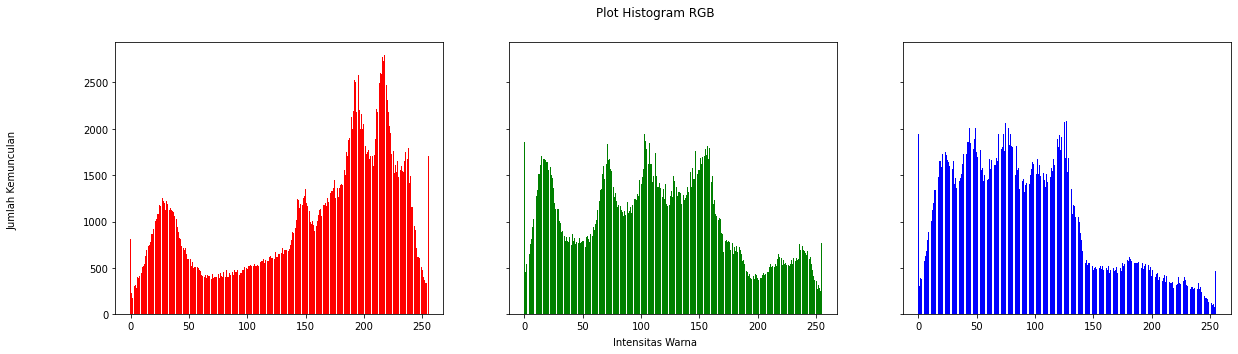

In [28]:
img = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
height, width, depth, = np.shape(img)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range (0,height):
  for x in range (0,width):
    blue[img[y][x][0]] += 1
    green[img[y][x][1]] +=1
    red[img[y][x][2]] +=1

names = np.arange(256)
fig, axs  = plt.subplots(1,3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Plot Histogram RGB')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

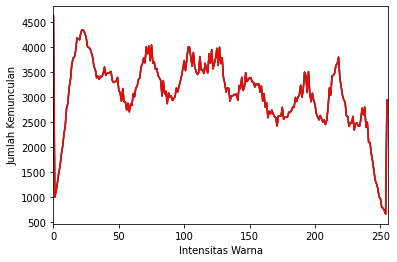

In [9]:
colors = ("b","g","r")
channel = (0,1,2)

plt.xlim([0,256])
for channel_res, c in zip(channel, colors):
  histogram, bin_edges = np.histogram(
      img[:,:, channel], bins=256, range=(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Intensitas Warna")
plt.ylabel("Jumlah Kemunculan")

plt.show()

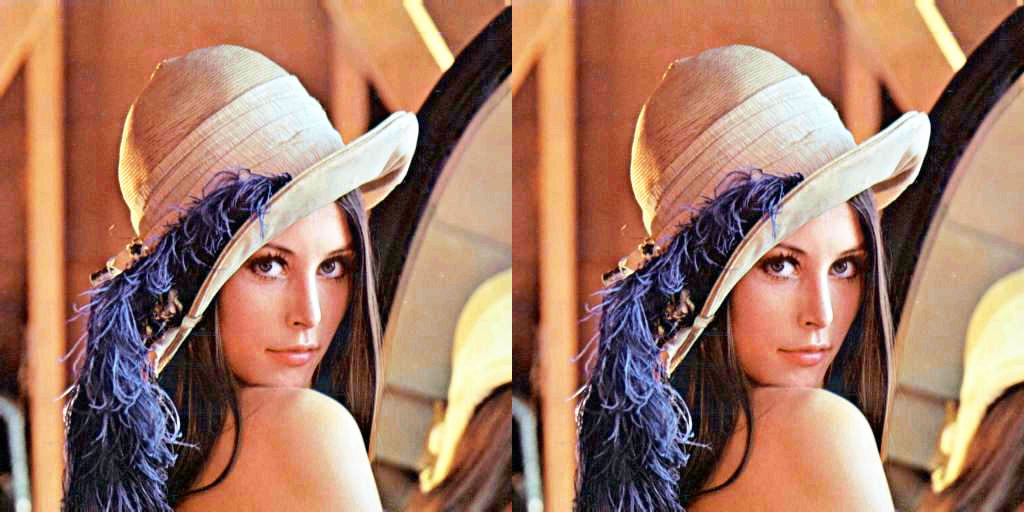

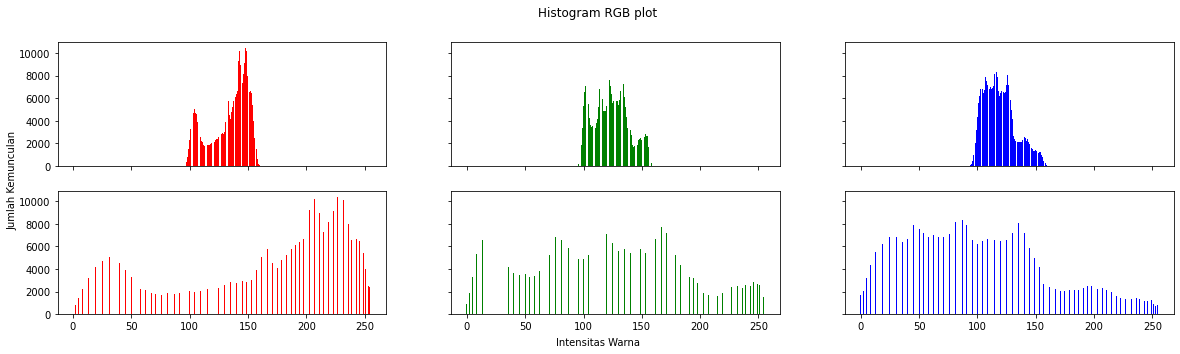

In [17]:
img2 = cv.imread("/content/drive/MyDrive/PCVK/lena_lc.jpg")
def histog(img):
  height,width,depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range (0, height):
    for x in range(0,height):
      ax[0][img2[y][x][0]] +=1
      ax[1][img2[y][x][1]] +=1
      ax[2][img2[y][x][2]] +=1
  return ax

histo_res = histog(img2)

#convert to Numpy array 
img_array = np.asarray(img2)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img2, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_res[2], color='red') 
  axs[0,1].bar(names, histo_res[1], color='green') 
  axs[0,2].bar(names, histo_res[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_res[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

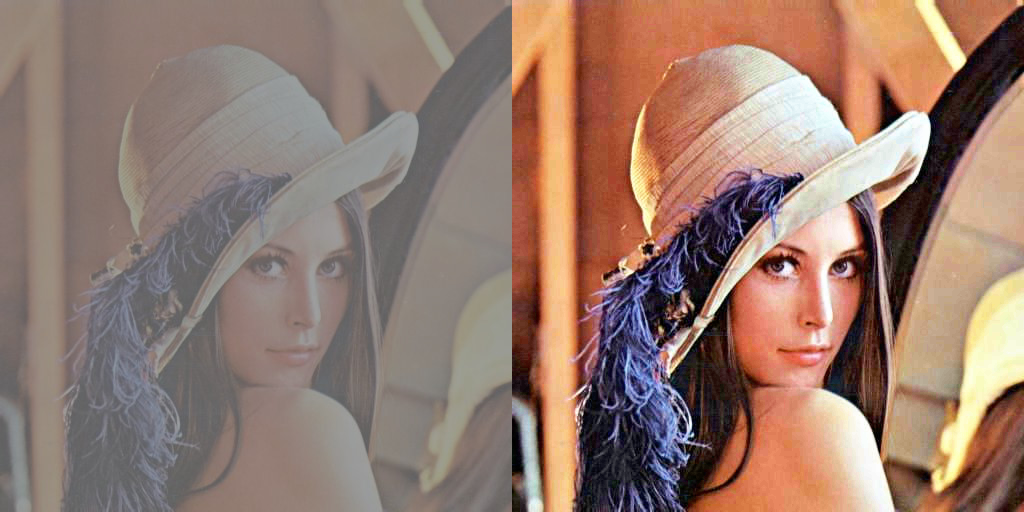

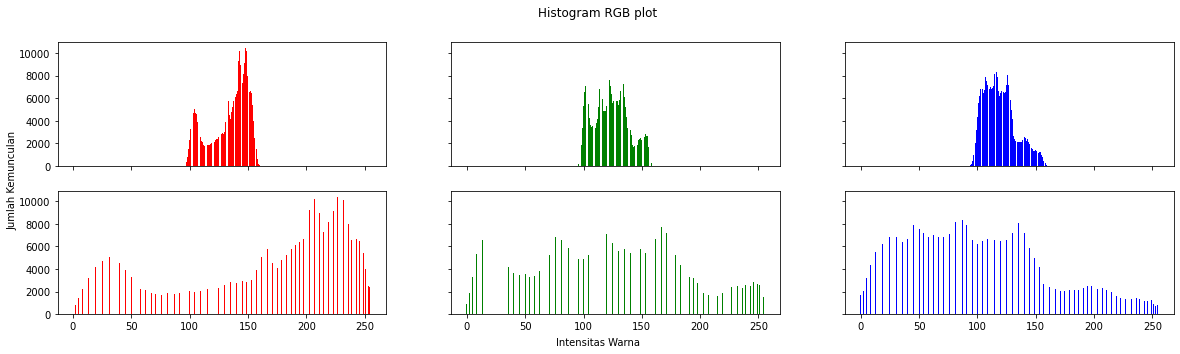

In [12]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg') 
def histog(img1):
  height, width, depth = np.shape(img1) 
  ax = np.zeros((3,256)) 
  for y in range(0,height) : 
    for x in range(0,width) :
      ax[0][img1[y][x][0]] += 1 
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1 
  return ax

histo_asli = histog(img1)

#convert to Numpy array 
img_array = np.asarray(img1)

#Step 1: Normalized cumulative histogram
#flatten image array and calculate histogram via binning 
histogram_array = np.bincount(img_array.flatten(), minlength=256)

#normalize 
num_pixels = np. sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#normalized cumulative histogram 
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(blue, green, red) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

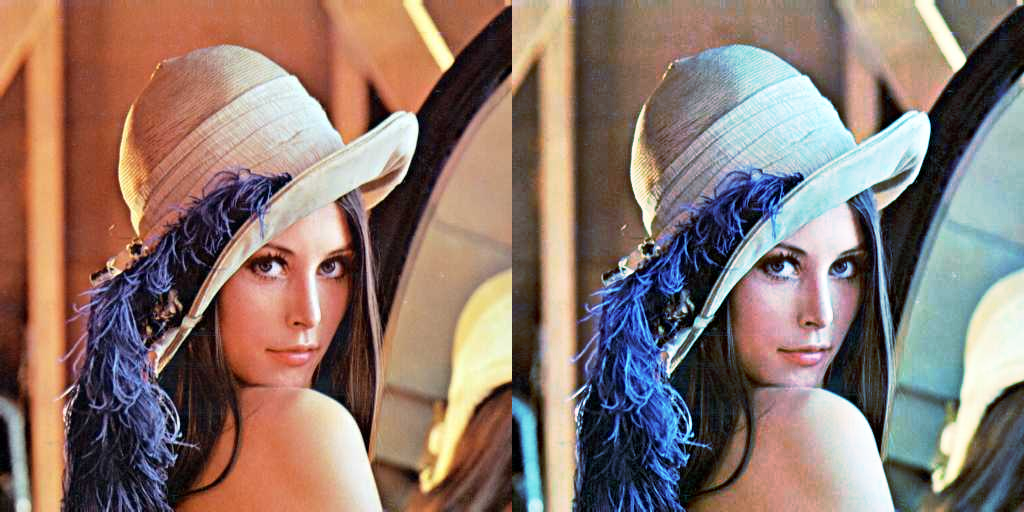

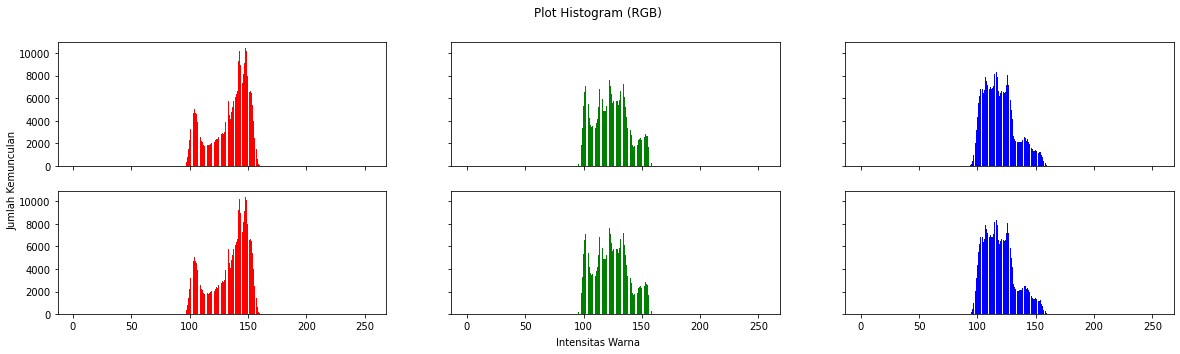

In [18]:
channels = cv.split(img)
eq_channels = []
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((img, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
grayer = np.array_equal(blue,green,red)
if(grayer == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex = True, sharey = True)
  fig.suptitle('Plot Histogram (RGB)')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_res[2], color='red')
  axs[0,1].bar(names, histo_res[1], color='green')
  axs[0,2].bar(names, histo_res[0], color='blue')
  axs[1,0].bar(names, histo_res[2], color='red')
  axs[1,1].bar(names, histo_res[1], color='green')
  axs[1,2].bar(names, histo_res[0], color='blue')
else:
  fig,axs = plt.suplots(1,2, figsize=[20,5], sharex = True, sharey=True)
  fig.suptitle('Plot Histogram (RGB')
  fig.text(0.09,0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5,0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_res[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color="gray")


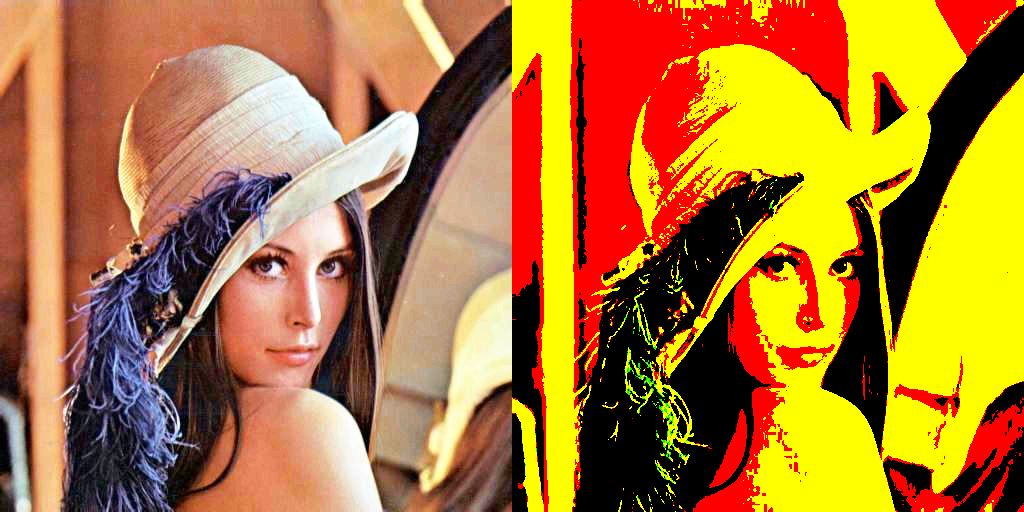

True

In [22]:
def nearestColor (r,g,b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  palette = [[0,0,0], [255,0,0], [0,255,0], [255,255,0], [0,0,255], [255,0,255], [0,255,255], [255,255,255]]
  for i in range(len(palette)):
    rDiff = r - palette[i][0]
    gDiff = g - palette[i][1]
    bDiff = b = palette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

palette = [[0,0,0], [255,0,0], [0,255,0], [255,255,0], [0,0,255], [255,0,255], [0,255,255], [255,255,255]]
imgUncolor = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
imgColor = np.zeros(imgUncolor.shape, imgUncolor.dtype)

for y in range(0, imgUncolor.shape[0]):
  for x in range(0, imgUncolor.shape[1]):
    coloring = nearestColor(imgUncolor[y,x,0], imgUncolor[y,x,1], imgUncolor[y,x,2])
    imgColor[y,x] = palette[coloring]

imgUncolor = cv.cvtColor(imgUncolor, cv.COLOR_BGR2RGB)
imgColor = cv.cvtColor(imgColor, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((imgUncolor, imgColor))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/test_lena.jpg', imgColor)

In [23]:
from PIL import Image
imageConvert = Image.open('/content/drive/MyDrive/PCVK/wiki.jpg').convert(mode="1", dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/wiki2.jpg')

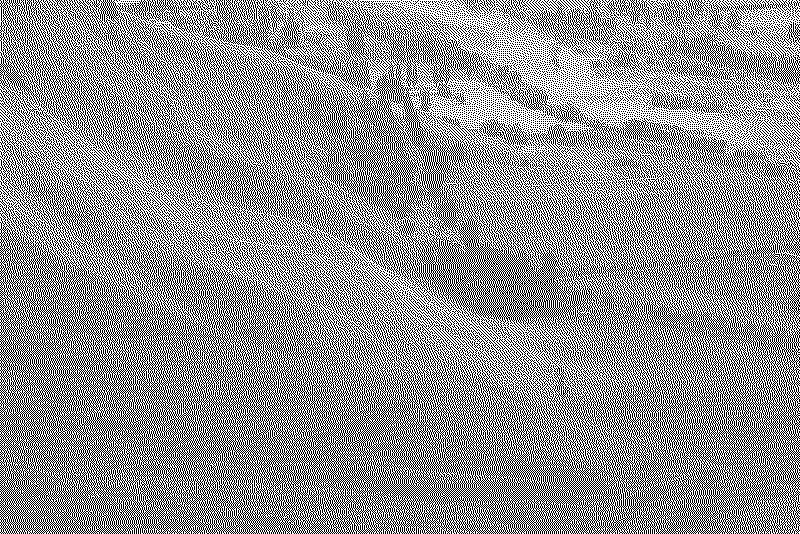

In [27]:
imgConvert = cv.imread('/content/drive/MyDrive/PCVK/wiki.jpg')
imgGray = cv.cvtColor(imgConvert, cv.COLOR_BGR2GRAY)
cv.imwrite('/content/drive/MyDrive/PCVK/wiki2.jpg', imgGray)

h = imgGray.shape[0]
w = imgGray.shape[1]

for y in range (0,h):
  for x in range (0,w):
    old = imgGray[y,x]
    new = 0
    if(old>128):
      new = 255
    
    imgGray[y,x] = new
    Error = old - new

    if(x<w-1):
      newNum = imgGray[y, x+1]+Error*7/16
      if(newNum>255) : newNum = 255
      elif(newNum<0): newNum = 0
      imgGray[y, x+1] = newNum
    
    if(x>0 and y<h-1):
      newNum = imgGray[y+1, x-1]+Error*3/16
      if(newNum>255) : newNum = 255
      elif(newNum<0): newNum = 0
      imgGray[y+1, x-1] = newNum
    
    if(y<h-1):
      newNum = imgGray[y+1, x]+Error*5/16
      if(newNum>255) : newNum = 255
      elif(newNum<0): newNum = 0
      imgGray[y+1, x] = newNum
    
    if(y<h-1 and x<w-1):
      newNum = imgGray[y+1, x+1]+Error*1/16
      if(newNum>255) : newNum = 255
      elif(newNum<0): newNum = 0
      imgGray[y+1, x+1] = newNum

cv.imwrite('/content/drive/MyDrive/PCVK/wiki2.jpg', imgGray)
cv2_imshow(imgGray)
 